In [317]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud

import nltk
import string
import re
from nltk.corpus import stopwords

In [244]:
#Reading the csv files with pandas
dataset = pd.read_csv("flipkart_com-ecommerce_sample.csv")
dataset.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [245]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [247]:
for i in dataset.product_category_tree:
    dataset.replace(i, i.replace('["',''), inplace=True)
dataset.head()    

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [248]:
for i in dataset.product_category_tree:
    dataset.replace(i, i.replace('"]',''), inplace=True)
dataset.head()         

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [249]:
# pd.DataFrame(dataset.product_category_tree.str.split(" ,").tolist())
new = dataset["product_category_tree"].str.split(" >> ", n = 7, expand = True)
new

,0,1,2,3,4,5,6,7
0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
1,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,None,None
2,Footwear,Women's Footwear,Ballerinas,AW Bellies,None,None,None,None
3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
4,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),None,None,None
...,...,...,...,...,...,...,...,...
19995,Baby Care,Baby & Kids Gifts,Stickers,WallDesign Stickers,None,None,None,None
19996,Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,None,None,None,None
19997,Baby Care,Baby & Kids Gifts,Stickers,Elite Collection Stickers,None,None,None,None
19998,Baby Care,Baby & Kids Gifts,Stickers,Elite Collection Stickers,None,None,None,None


In [250]:
dataset.drop(columns =["product_category_tree"], inplace = True)
dataset["category"]= new[0]
dataset["subcategory_1"]= new[1]
dataset["subcategory_2"]= new[2]

In [251]:
dataset

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,subcategory_1,subcategory_2
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/st

In [255]:
dataset.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
category                      0
subcategory_1               328
subcategory_2              1457
dtype: int64

In [263]:
dataset.dropna(axis = "index", subset = "description", inplace=True)

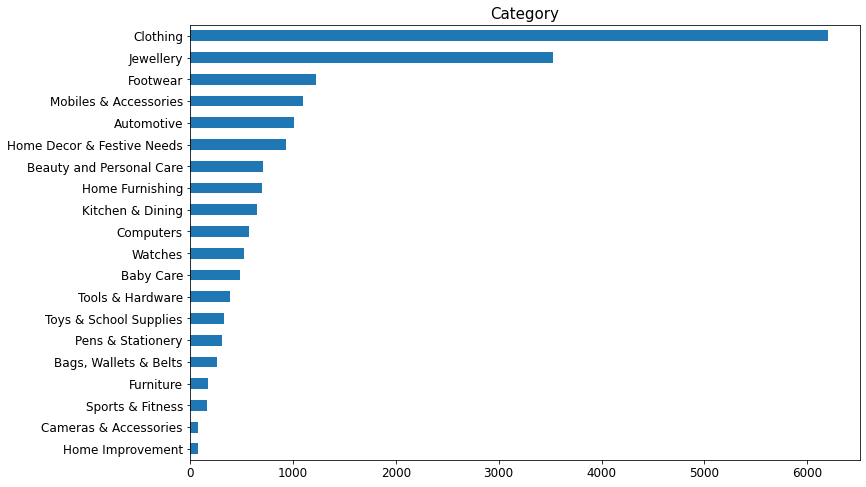

Top Ten Main Categories

Clothing                      6197
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                699
Kitchen & Dining               647
Computers                      578
Name: category, dtype: int64


In [264]:
plt.figure(figsize=(12,8))
dataset["category"].value_counts()[:20].sort_values(ascending=True).plot(kind="barh")
plt.title("Category",fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print("Top Ten Main Categories\n")
print(dataset["category"].value_counts()[:10])


In [265]:
dataset["description"] = dataset["description"].str.lower()

In [266]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')

In [279]:
# descriptions = [] !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# for i in dataset.description:
#     descriptions.append(i)

# tokenized_descriptions = tokenizer.tokenize(descriptions)

# print(len(tokenized_descriptions))
descriptions = " ".join(desc for desc in dataset["description"])

tokenized_descriptions = tokenizer.tokenize(descriptions)
print(len(tokenized_descriptions))

1344267


In [280]:
dataset["tokenized_description"] = dataset.apply(lambda row: tokenizer.tokenize(row["description"]), axis=1)

In [281]:
dataset.tokenized_desc

0        [key, features, of, alisha, solid, women, s, c...
1        [fabhomedecor, fabric, double, sofa, bed, fini...
2        [key, features, of, aw, bellies, sandals, wedg...
3        [key, features, of, alisha, solid, women, s, c...
4        [specifications, of, sicons, all, purpose, arn...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, for, ...
19996    [buy, wallmantra, large, vinyl, stickers, stic...
19997    [buy, elite, collection, medium, acrylic, stic...
19998    [buy, elite, collection, medium, acrylic, stic...
19999    [buy, elite, collection, medium, acrylic, stic...
Name: tokenized_desc, Length: 19998, dtype: object

In [335]:
def list_to_string (text):
    string = "".join(text)
    string = string.replace(' ', ', ')
    return string

In [336]:
dataset['tokenized_desc_0'] = dataset.apply(lambda row: list_to_string(row['description']), axis=1)

In [337]:
dataset.tokenized_desc_0

0        key, features, of, alisha, solid, women's, cyc...
1        fabhomedecor, fabric, double, sofa, bed, (fini...
2        key, features, of, aw, bellies, sandals, wedge...
3        key, features, of, alisha, solid, women's, cyc...
4        specifications, of, sicons, all, purpose, arni...
                               ...                        
19995    buy, walldesign, small, vinyl, sticker, for, r...
19996    buy, wallmantra, large, vinyl, stickers, stick...
19997    buy, elite, collection, medium, acrylic, stick...
19998    buy, elite, collection, medium, acrylic, stick...
19999    buy, elite, collection, medium, acrylic, stick...
Name: tokenized_desc_0, Length: 19998, dtype: object

In [315]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 18,
        }

def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]


# mask = np.array(Image.open('w_wine.png'))
 
def plot_world_cloud(df,
                     column,
                     nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#000000',
                           colormap='Set2',
                           random_state=4
                           # mask=mask
                          )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("{} column word cloud (top {}) \n".format(
        column, nb_top), fontdict=font)
    plt.show()

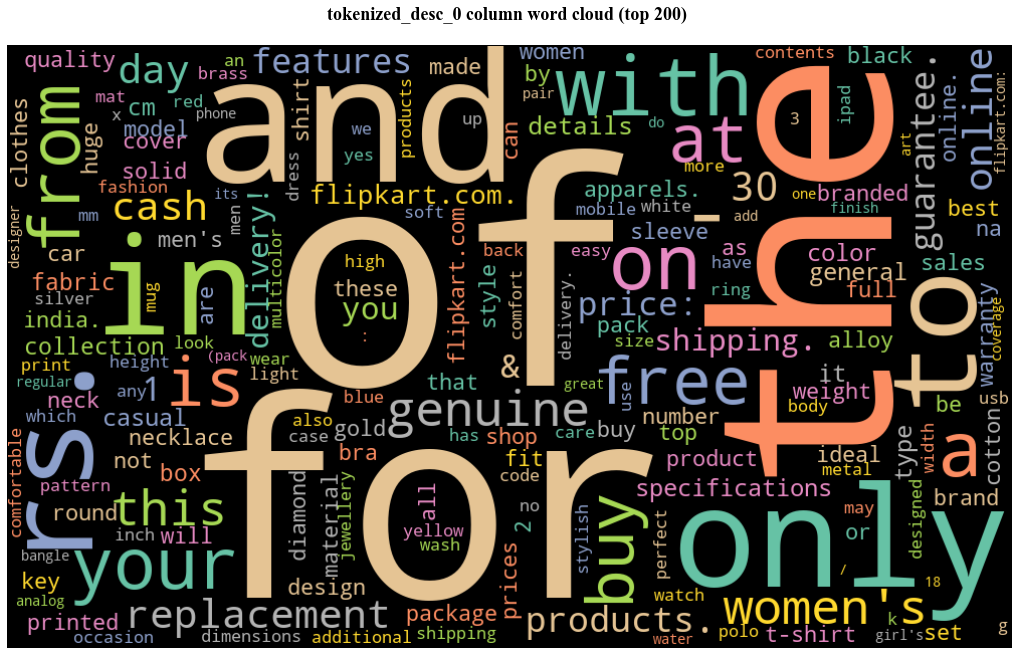

In [316]:
plot_world_cloud(df=dataset, column="tokenized_desc_0", nb_top=200)

In [320]:
nltk.download("punkt")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

dataset['clean_tokenized_desc'] = dataset['tokenized_desc'].apply(lambda x:[word for word in x if word not in stop_words and word.isalnum()])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [321]:
dataset.clean_tokenized_desc

0        [key, features, alisha, solid, women, cycling,...
1        [fabhomedecor, fabric, double, sofa, bed, fini...
2        [key, features, aw, bellies, sandals, wedges, ...
3        [key, features, alisha, solid, women, cycling,...
4        [specifications, sicons, purpose, arnica, dog,...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, rs, o...
19996    [buy, wallmantra, large, vinyl, stickers, stic...
19997    [buy, elite, collection, medium, acrylic, stic...
19998    [buy, elite, collection, medium, acrylic, stic...
19999    [buy, elite, collection, medium, acrylic, stic...
Name: clean_tokenized_desc, Length: 19998, dtype: object

In [338]:
def list_to_string_2 (text):
    string = ', '.join(text)
    return string

In [339]:
dataset['clean_tokenized_desc_0'] = dataset.apply(lambda row: list_to_string_2(row['clean_tokenized_desc']), axis=1)

In [342]:
dataset.clean_tokenized_desc_0

0        key, features, alisha, solid, women, cycling, ...
1        fabhomedecor, fabric, double, sofa, bed, finis...
2        key, features, aw, bellies, sandals, wedges, h...
3        key, features, alisha, solid, women, cycling, ...
4        specifications, sicons, purpose, arnica, dog, ...
                               ...                        
19995    buy, walldesign, small, vinyl, sticker, rs, on...
19996    buy, wallmantra, large, vinyl, stickers, stick...
19997    buy, elite, collection, medium, acrylic, stick...
19998    buy, elite, collection, medium, acrylic, stick...
19999    buy, elite, collection, medium, acrylic, stick...
Name: clean_tokenized_desc_0, Length: 19998, dtype: object

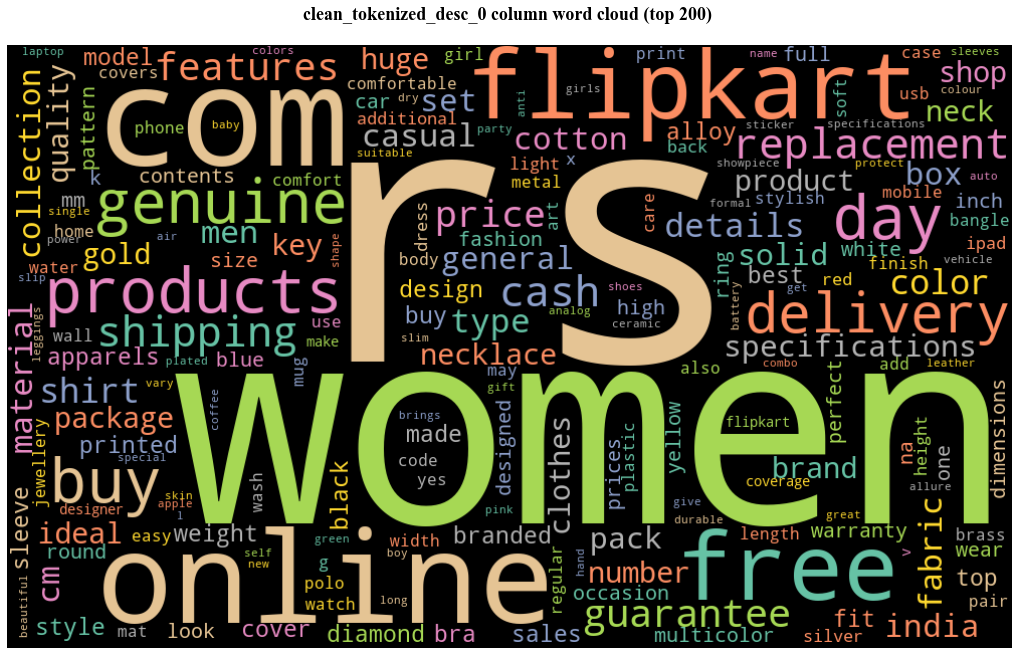

In [343]:
plot_world_cloud(df=dataset, column="clean_tokenized_desc_0", nb_top=200)